<div style="text-align: center; margin-top: 2em;">
    <span style="font-family: 'Times New Roman', Times, serif; font-size: 2em; font-weight: bold;">
       Numerical Approximation of Heat Distribution on a Rod
    </span>
    <br>
    <span style="font-family: 'Times New Roman', Times, serif; font-size: 1.5em;">
        supporting code by Justin Loi
    </span>
</div>

We generate data for the heat error function using natural cubic splines and use it to graph the heat distribution of a rod. 

The error function $\text{erf} : \mathbb{R} \rightarrow \mathbb{R}$ is defined as

$$
\text{erf}(x) := \frac{2}{\sqrt{\pi}} \int_{0}^{x} e^{-t^2} \, dt
$$

(The factor $\frac{2}{\sqrt{\pi}}$ is a normalizing constant.) Its name comes from its frequent use in probability and statistics, but it also appears in other branches of mathematics, such as partial differential equations (in particular in solving the heat equation, as we shall see).


Consider the initial value problem
\begin{align}
u_t &= u_{xx} \quad (1)\\
u|_{t=0} &= 
\begin{cases}
1, & x \geq 0\\
0, & x < 0
\end{cases} \quad (2)
\end{align}
For simplicity, we have taken the diffusion constant \(k\) to be 1. The particular solution of this PDE is given by 


$$ u(x, t) = \frac{1}{\sqrt{4\pi t}} \int_{0}^{\infty} e^{-\frac{(y - x)^2}{4t}} \, dy = \frac{1}{\sqrt{\pi}} \int_{-\frac{x}{\sqrt{4t}}}^{\infty} e^{-z^2} \, dz $$


In [7]:
import math 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt



# Helper Processing Functions

In [61]:

# Prints the piecewise polynomial equations for a given PPoly instance. 
def print_ppoly_equations(ppoly_instance):
    coefficients = ppoly_instance.c
    breakpoints = ppoly_instance.x

    for i in range(coefficients.shape[1]):
        segment_coef = coefficients[:, i]
        # Ignore leading coefficients that are zero
        segment_coef = segment_coef[np.nonzero(segment_coef)[0][0]:]
        equation = format_polynomial(segment_coef)
        print(f'For x in [{breakpoints[i]}, {breakpoints[i + 1]}]:')
        print(f'    {equation}')

# formats interpolation equations
def format_polynomial(coefs, var='x'):
    """
    Formats a single polynomial piece given its coefficients.
    """
    n = len(coefs)
    terms = []
    for i, coef in enumerate(coefs):
        power = n - i - 1
        if coef != 0:
            if power == 0:
                terms.append(f'{coef:.3f}')
            elif power == 1:
                terms.append(f'{coef:.3f}*{var}')
            else:
                terms.append(f'{coef:.3f}*{var}^{power}')
    return ' + '.join(terms) if terms else '0'

#plots polynomials under u(x,t) value
def plot_ppoly(ppoly_instance, t):
    
    x_min, x_max = 0,1 #ppoly_instance.x[0], ppoly_instance.x[-1]

    x_values = np.linspace(x_min, x_max, 15)

    y_values = ppoly_instance(x_values)

    # u(x,t value) 
    modified_y_values =  0.5 - 0.5 * (y_values * (2 / math.sqrt(math.pi))) 

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, modified_y_values, label=f"T = {t}")
    plt.title("Plot of u(x,t_0)")
    plt.xlabel("x (Position)")
    plt.ylabel("u(x,t_0) ")
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 1)

    plt.show()


# Interpolation
We reference the following data: 

- 5 x values (position) and their corresponding y values 
- 3 t values (time)

3 sets of y values corresponding to different t values are generated, then use each set of (x,y) points to interpolate 3 times

Given ideal conditions of a rod with one section higher temperature than the other, the heat equation can describe how heat diffuses through the rod over time. The equation’s approximate numerical solution under the initial boundary conditions used approaches the form of a Gaussian distribution as the temperature difference evens out over time. 

The heat equation represents the temperature at position x and time t. It is the product of the thermal diffusivity of the rod and the second derivative of the temperature. The second derivative reflects the temperature difference between neighboring positions as heat distributes over the rod over time. The diffusion of heat by the heat equation inherentlaverages out temperature differences as a result of heat transferring from high temperature to low temperature regions of the rod, eventually smoothing out the initial temperature differences  as time goes by.
 

In [62]:
a = 0
k = 1

# error function approximation
def erf_app(x, t):

    p = (a - x) / math.sqrt(4 * k * t)
    return (math.e) ** (-(p**2))


t = 1
Data referencing: 
 y: [0.9975031223974601, 0.9900498337491681, 0.9607894391523232, 0.9139311852712282, 0.8521437889662113]
 x: [0.1, 0.2, 0.4, 0.6, 0.8]


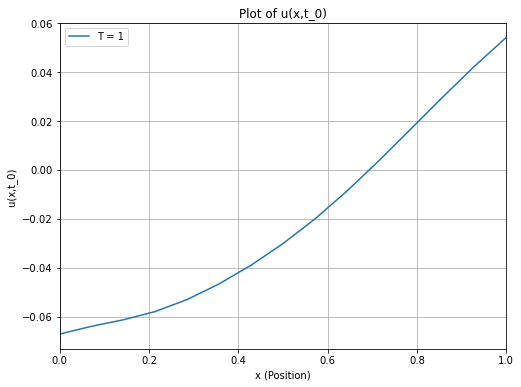

For x in [0.1, 0.2]:
    -0.975*x^3 + -0.065*x + 0.998
For x in [0.2, 0.4]:
    0.155*x^3 + -0.292*x^2 + -0.094*x + 0.990
For x in [0.4, 0.6]:
    -0.051*x^3 + -0.199*x^2 + -0.192*x + 0.961
For x in [0.6, 0.8]:
    0.383*x^3 + -0.230*x^2 + -0.278*x + 0.914
t = 0.5
Data referencing: 
 y: [0.9950124791926823, 0.9801986733067553, 0.9231163463866358, 0.8352702114112721, 0.7261490370736909]
 x: [0.1, 0.2, 0.4, 0.6, 0.8]


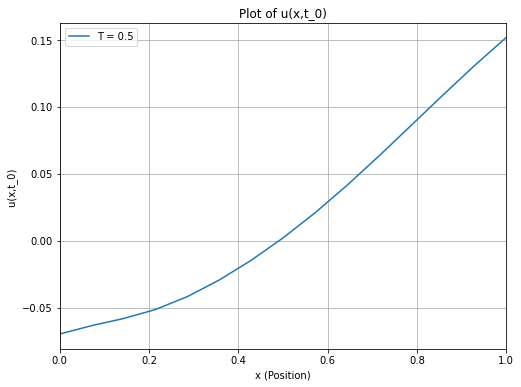

For x in [0.1, 0.2]:
    -1.890*x^3 + 0.000*x^2 + -0.129*x + 0.995
For x in [0.2, 0.4]:
    0.349*x^3 + -0.567*x^2 + -0.186*x + 0.980
For x in [0.4, 0.6]:
    0.080*x^3 + -0.358*x^2 + -0.371*x + 0.923
For x in [0.6, 0.8]:
    0.516*x^3 + -0.309*x^2 + -0.504*x + 0.835
t = 0.2
Data referencing: 
 y: [0.9875778004938814, 0.951229424500714, 0.8187307530779818, 0.6376281516217733, 0.44932896411722156]
 x: [0.1, 0.2, 0.4, 0.6, 0.8]


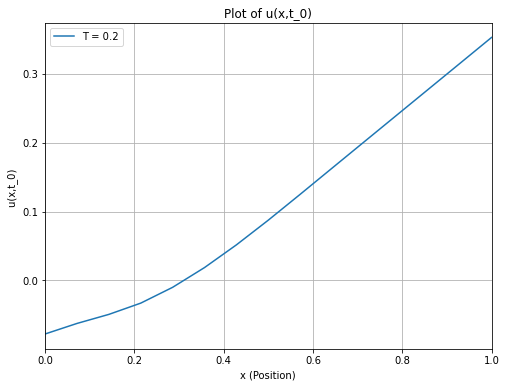

For x in [0.1, 0.2]:
    -4.328*x^3 + -0.320*x + 0.988
For x in [0.2, 0.4]:
    1.181*x^3 + -1.298*x^2 + -0.450*x + 0.951
For x in [0.4, 0.6]:
    1.004*x^3 + -0.590*x^2 + -0.828*x + 0.819
For x in [0.6, 0.8]:
    -0.021*x^3 + 0.013*x^2 + -0.943*x + 0.638


In [63]:
x_points = [0.1, 0.2, 0.4, 0.6, 0.8]
t_points = [1, 0.5, 0.2]

for t in t_points:
    y_points = [erf_app(x, t) for x in x_points]
    print(f"t = {t}\nData referencing: \n y: {y_points}\n x: {x_points}")

    cs = CubicSpline(x_points, y_points, bc_type ='natural')

    plot_ppoly(cs,t)
    print_ppoly_equations(cs)

    



# Sample usage of cubic spline

In [65]:
x_points = [0, 1, 2, 3]
y_points = [1, math.e, math.e**2, math.e**3]

cs = CubicSpline(x_points, y_points, bc_type ='natural')

print_ppoly_equations(cs)


For x in [0.0, 1.0]:
    0.252*x^3 + -0.000*x^2 + 1.466*x + 1.000
For x in [1.0, 2.0]:
    1.691*x^3 + 0.757*x^2 + 2.223*x + 2.718
For x in [2.0, 3.0]:
    -1.943*x^3 + 5.830*x^2 + 8.810*x + 7.389
